<a href="https://colab.research.google.com/github/cityu-assignment/CS3481-assignment1/blob/main/cs3481_asm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from scipy.io import arff
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import graphviz 

# Data Processing

In [110]:
data = arff.loadarff("/content/column_3C_weka.arff")
df = pd.DataFrame(data[0])
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Hernia'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Hernia'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Hernia'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Hernia'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Hernia'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [111]:
df['class'] = df['class'].astype('string')
df['class'] = [i[1:] for i in df['class']]
df['class']

0      'Hernia'
1      'Hernia'
2      'Hernia'
3      'Hernia'
4      'Hernia'
         ...   
305    'Normal'
306    'Normal'
307    'Normal'
308    'Normal'
309    'Normal'
Name: class, Length: 310, dtype: object

In [112]:
X = df.iloc[:,:6].values
X[0:5]

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       [ 69.29700807,  24.65287791,  44.31123813,  44.64413017,
        101.8684951 ,  11.21152344],
       [ 49.71285934,   9.65207488,  28.317406  ,  40.06078446,
        108.1687249 ,   7.91850062]])

In [113]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['class'])
y = label_encoder.transform(df['class'])

# Analysis Multiple Decision Trees

In [115]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

def constructDecisionTrees(selected_Criterion):
  max_treeDepth = [i for i in range(1, 15)]

  for i in range(1, 10):
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=i/10, random_state=0)
    train_errors = [] # Log training errors for each model
    test_errors = [] # Log testing errors for each model
    print('Test size: %.1f ------------------------------------------------------->' % (i/10))

    for x in max_treeDepth:
      dtc = DecisionTreeClassifier(criterion=selected_Criterion
                                  ,max_depth=x
                                  ,splitter="random"
                                  ,random_state=0
                                 ) 
    
      dtc.fit(X_trainset, y_trainset)
      train_z = dtc.predict(X_trainset)
      test_z = dtc.predict(X_testset)

      train_acc = accuracy_score(y_trainset, train_z)
      test_acc = accuracy_score(y_testset, test_z)
    
      train_errors.append(train_acc)
      test_errors.append(test_acc)
      print('>%d, train: %.3f, test: %.3f, acc: %.5f' % (x, train_acc, test_acc, (accuracy_score(y_testset, test_z))))
    
    plt.plot(max_treeDepth, train_errors, '-o', label='Train') # Plot training error over domain
    plt.plot(max_treeDepth, test_errors, '-o', label='Test') # Plot testing error over domain
    plt.ylabel('Accuracy')
    plt.xlabel('Maximum Depth') # Label x-axis
    plt.legend() # Show plot labels as legend
    plt.show() # Show graph
    print('\n')


**If criterion is entropy**



Test size: 0.1 ------------------------------------------------------->
>1, train: 0.556, test: 0.484, acc: 0.48387
>2, train: 0.667, test: 0.645, acc: 0.64516
>3, train: 0.663, test: 0.613, acc: 0.61290
>4, train: 0.724, test: 0.548, acc: 0.54839
>5, train: 0.720, test: 0.677, acc: 0.67742
>6, train: 0.860, test: 0.613, acc: 0.61290
>7, train: 0.849, test: 0.774, acc: 0.77419
>8, train: 0.925, test: 0.645, acc: 0.64516
>9, train: 0.943, test: 0.645, acc: 0.64516
>10, train: 0.932, test: 0.774, acc: 0.77419
>11, train: 0.986, test: 0.677, acc: 0.67742
>12, train: 0.978, test: 0.774, acc: 0.77419
>13, train: 0.993, test: 0.774, acc: 0.77419
>14, train: 0.993, test: 0.742, acc: 0.74194


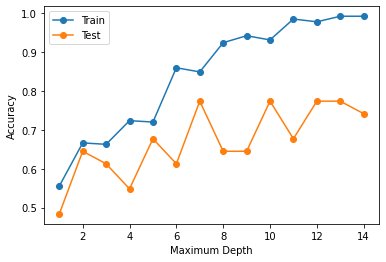



Test size: 0.2 ------------------------------------------------------->
>1, train: 0.552, test: 0.532, acc: 0.53226
>2, train: 0.681, test: 0.597, acc: 0.59677
>3, train: 0.661, test: 0.645, acc: 0.64516
>4, train: 0.750, test: 0.661, acc: 0.66129
>5, train: 0.718, test: 0.629, acc: 0.62903
>6, train: 0.810, test: 0.758, acc: 0.75806
>7, train: 0.843, test: 0.710, acc: 0.70968
>8, train: 0.931, test: 0.758, acc: 0.75806
>9, train: 0.952, test: 0.806, acc: 0.80645
>10, train: 0.935, test: 0.790, acc: 0.79032
>11, train: 0.956, test: 0.758, acc: 0.75806
>12, train: 0.996, test: 0.758, acc: 0.75806
>13, train: 0.996, test: 0.806, acc: 0.80645
>14, train: 1.000, test: 0.774, acc: 0.77419


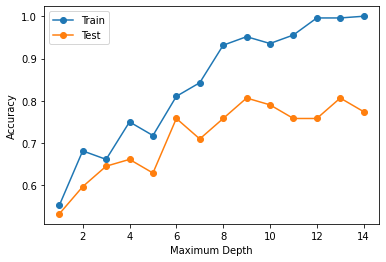



Test size: 0.3 ------------------------------------------------------->
>1, train: 0.567, test: 0.505, acc: 0.50538
>2, train: 0.673, test: 0.591, acc: 0.59140
>3, train: 0.705, test: 0.602, acc: 0.60215
>4, train: 0.760, test: 0.677, acc: 0.67742
>5, train: 0.737, test: 0.613, acc: 0.61290
>6, train: 0.802, test: 0.645, acc: 0.64516
>7, train: 0.889, test: 0.753, acc: 0.75269
>8, train: 0.917, test: 0.753, acc: 0.75269
>9, train: 0.926, test: 0.699, acc: 0.69892
>10, train: 0.935, test: 0.753, acc: 0.75269
>11, train: 0.972, test: 0.731, acc: 0.73118
>12, train: 0.995, test: 0.817, acc: 0.81720
>13, train: 1.000, test: 0.817, acc: 0.81720
>14, train: 1.000, test: 0.817, acc: 0.81720


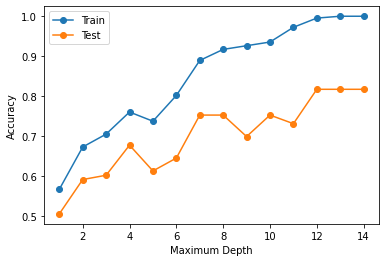



Test size: 0.4 ------------------------------------------------------->
>1, train: 0.570, test: 0.516, acc: 0.51613
>2, train: 0.656, test: 0.605, acc: 0.60484
>3, train: 0.699, test: 0.629, acc: 0.62903
>4, train: 0.737, test: 0.694, acc: 0.69355
>5, train: 0.780, test: 0.702, acc: 0.70161
>6, train: 0.817, test: 0.669, acc: 0.66935
>7, train: 0.887, test: 0.758, acc: 0.75806
>8, train: 0.876, test: 0.726, acc: 0.72581
>9, train: 0.898, test: 0.718, acc: 0.71774
>10, train: 0.946, test: 0.710, acc: 0.70968
>11, train: 0.962, test: 0.734, acc: 0.73387
>12, train: 0.984, test: 0.750, acc: 0.75000
>13, train: 0.984, test: 0.750, acc: 0.75000
>14, train: 0.995, test: 0.782, acc: 0.78226


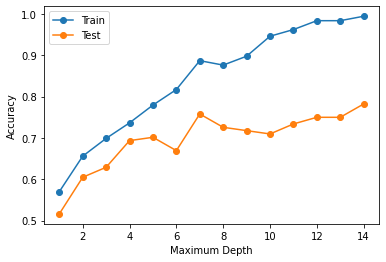



Test size: 0.5 ------------------------------------------------------->
>1, train: 0.555, test: 0.542, acc: 0.54194
>2, train: 0.626, test: 0.639, acc: 0.63871
>3, train: 0.710, test: 0.632, acc: 0.63226
>4, train: 0.774, test: 0.710, acc: 0.70968
>5, train: 0.781, test: 0.690, acc: 0.69032
>6, train: 0.806, test: 0.710, acc: 0.70968
>7, train: 0.884, test: 0.787, acc: 0.78710
>8, train: 0.897, test: 0.800, acc: 0.80000
>9, train: 0.948, test: 0.787, acc: 0.78710
>10, train: 0.968, test: 0.748, acc: 0.74839
>11, train: 0.981, test: 0.774, acc: 0.77419
>12, train: 0.994, test: 0.794, acc: 0.79355
>13, train: 1.000, test: 0.813, acc: 0.81290
>14, train: 1.000, test: 0.813, acc: 0.81290


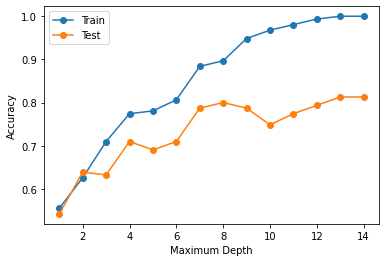



Test size: 0.6 ------------------------------------------------------->
>1, train: 0.597, test: 0.516, acc: 0.51613
>2, train: 0.653, test: 0.618, acc: 0.61828
>3, train: 0.734, test: 0.608, acc: 0.60753
>4, train: 0.815, test: 0.672, acc: 0.67204
>5, train: 0.839, test: 0.677, acc: 0.67742
>6, train: 0.815, test: 0.661, acc: 0.66129
>7, train: 0.919, test: 0.720, acc: 0.72043
>8, train: 0.935, test: 0.720, acc: 0.72043
>9, train: 0.952, test: 0.742, acc: 0.74194
>10, train: 0.992, test: 0.742, acc: 0.74194
>11, train: 0.992, test: 0.720, acc: 0.72043
>12, train: 1.000, test: 0.710, acc: 0.70968
>13, train: 1.000, test: 0.710, acc: 0.70968
>14, train: 1.000, test: 0.710, acc: 0.70968


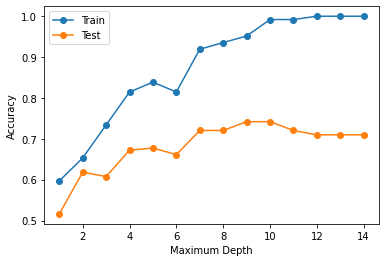



Test size: 0.7 ------------------------------------------------------->
>1, train: 0.624, test: 0.544, acc: 0.54378
>2, train: 0.677, test: 0.544, acc: 0.54378
>3, train: 0.828, test: 0.631, acc: 0.63134
>4, train: 0.839, test: 0.645, acc: 0.64516
>5, train: 0.860, test: 0.659, acc: 0.65899
>6, train: 0.839, test: 0.636, acc: 0.63594
>7, train: 0.978, test: 0.719, acc: 0.71889
>8, train: 0.978, test: 0.636, acc: 0.63594
>9, train: 1.000, test: 0.700, acc: 0.70046
>10, train: 1.000, test: 0.700, acc: 0.70046
>11, train: 1.000, test: 0.700, acc: 0.70046
>12, train: 1.000, test: 0.700, acc: 0.70046
>13, train: 1.000, test: 0.700, acc: 0.70046
>14, train: 1.000, test: 0.700, acc: 0.70046


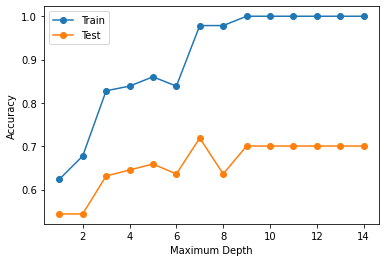



Test size: 0.8 ------------------------------------------------------->
>1, train: 0.613, test: 0.532, acc: 0.53226
>2, train: 0.677, test: 0.560, acc: 0.56048
>3, train: 0.839, test: 0.601, acc: 0.60081
>4, train: 0.839, test: 0.633, acc: 0.63306
>5, train: 0.903, test: 0.742, acc: 0.74194
>6, train: 0.952, test: 0.677, acc: 0.67742
>7, train: 0.984, test: 0.750, acc: 0.75000
>8, train: 1.000, test: 0.726, acc: 0.72581
>9, train: 1.000, test: 0.726, acc: 0.72581
>10, train: 1.000, test: 0.726, acc: 0.72581
>11, train: 1.000, test: 0.726, acc: 0.72581
>12, train: 1.000, test: 0.726, acc: 0.72581
>13, train: 1.000, test: 0.726, acc: 0.72581
>14, train: 1.000, test: 0.726, acc: 0.72581


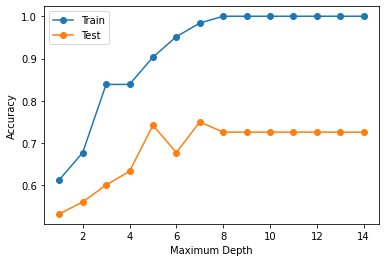



Test size: 0.9 ------------------------------------------------------->
>1, train: 0.677, test: 0.588, acc: 0.58781
>2, train: 0.742, test: 0.591, acc: 0.59140
>3, train: 0.839, test: 0.631, acc: 0.63082
>4, train: 0.871, test: 0.602, acc: 0.60215
>5, train: 0.903, test: 0.642, acc: 0.64158
>6, train: 0.935, test: 0.638, acc: 0.63799
>7, train: 1.000, test: 0.728, acc: 0.72760
>8, train: 1.000, test: 0.728, acc: 0.72760
>9, train: 1.000, test: 0.728, acc: 0.72760
>10, train: 1.000, test: 0.728, acc: 0.72760
>11, train: 1.000, test: 0.728, acc: 0.72760
>12, train: 1.000, test: 0.728, acc: 0.72760
>13, train: 1.000, test: 0.728, acc: 0.72760
>14, train: 1.000, test: 0.728, acc: 0.72760


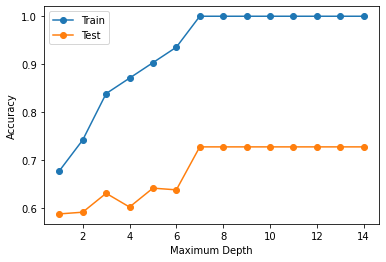

In [116]:
constructDecisionTrees('entropy')


**If criterion is gini**



Test size: 0.1 ------------------------------------------------------->
>1, train: 0.556, test: 0.484, acc: 0.48387
>2, train: 0.667, test: 0.645, acc: 0.64516
>3, train: 0.681, test: 0.613, acc: 0.61290
>4, train: 0.717, test: 0.645, acc: 0.64516
>5, train: 0.717, test: 0.677, acc: 0.67742
>6, train: 0.860, test: 0.613, acc: 0.61290
>7, train: 0.853, test: 0.774, acc: 0.77419
>8, train: 0.903, test: 0.742, acc: 0.74194
>9, train: 0.943, test: 0.806, acc: 0.80645
>10, train: 0.982, test: 0.710, acc: 0.70968
>11, train: 0.989, test: 0.710, acc: 0.70968
>12, train: 0.993, test: 0.710, acc: 0.70968
>13, train: 1.000, test: 0.742, acc: 0.74194
>14, train: 1.000, test: 0.742, acc: 0.74194


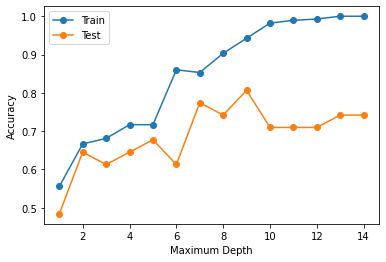



Test size: 0.2 ------------------------------------------------------->
>1, train: 0.552, test: 0.532, acc: 0.53226
>2, train: 0.681, test: 0.597, acc: 0.59677
>3, train: 0.669, test: 0.629, acc: 0.62903
>4, train: 0.718, test: 0.677, acc: 0.67742
>5, train: 0.738, test: 0.629, acc: 0.62903
>6, train: 0.810, test: 0.758, acc: 0.75806
>7, train: 0.887, test: 0.774, acc: 0.77419
>8, train: 0.931, test: 0.758, acc: 0.75806
>9, train: 0.952, test: 0.806, acc: 0.80645
>10, train: 0.935, test: 0.790, acc: 0.79032
>11, train: 0.964, test: 0.758, acc: 0.75806
>12, train: 0.996, test: 0.790, acc: 0.79032
>13, train: 0.996, test: 0.774, acc: 0.77419
>14, train: 1.000, test: 0.806, acc: 0.80645


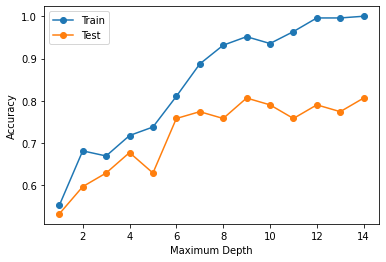



Test size: 0.3 ------------------------------------------------------->
>1, train: 0.567, test: 0.505, acc: 0.50538
>2, train: 0.673, test: 0.591, acc: 0.59140
>3, train: 0.705, test: 0.602, acc: 0.60215
>4, train: 0.728, test: 0.624, acc: 0.62366
>5, train: 0.733, test: 0.613, acc: 0.61290
>6, train: 0.802, test: 0.677, acc: 0.67742
>7, train: 0.889, test: 0.753, acc: 0.75269
>8, train: 0.917, test: 0.753, acc: 0.75269
>9, train: 0.935, test: 0.731, acc: 0.73118
>10, train: 0.940, test: 0.763, acc: 0.76344
>11, train: 0.959, test: 0.796, acc: 0.79570
>12, train: 0.986, test: 0.720, acc: 0.72043
>13, train: 0.995, test: 0.774, acc: 0.77419
>14, train: 1.000, test: 0.753, acc: 0.75269


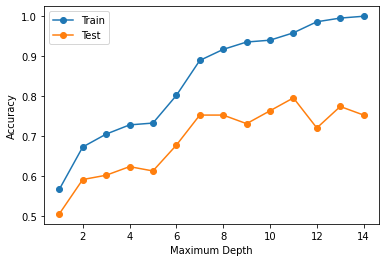



Test size: 0.4 ------------------------------------------------------->
>1, train: 0.570, test: 0.516, acc: 0.51613
>2, train: 0.656, test: 0.605, acc: 0.60484
>3, train: 0.710, test: 0.621, acc: 0.62097
>4, train: 0.742, test: 0.685, acc: 0.68548
>5, train: 0.780, test: 0.702, acc: 0.70161
>6, train: 0.823, test: 0.669, acc: 0.66935
>7, train: 0.887, test: 0.758, acc: 0.75806
>8, train: 0.876, test: 0.726, acc: 0.72581
>9, train: 0.903, test: 0.750, acc: 0.75000
>10, train: 0.957, test: 0.726, acc: 0.72581
>11, train: 0.968, test: 0.782, acc: 0.78226
>12, train: 0.984, test: 0.782, acc: 0.78226
>13, train: 0.978, test: 0.790, acc: 0.79032
>14, train: 1.000, test: 0.702, acc: 0.70161


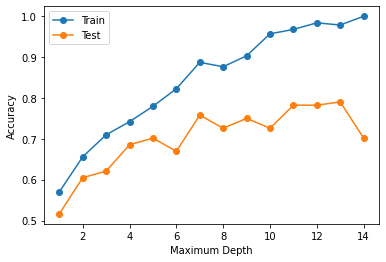



Test size: 0.5 ------------------------------------------------------->
>1, train: 0.555, test: 0.542, acc: 0.54194
>2, train: 0.626, test: 0.639, acc: 0.63871
>3, train: 0.716, test: 0.632, acc: 0.63226
>4, train: 0.774, test: 0.710, acc: 0.70968
>5, train: 0.787, test: 0.652, acc: 0.65161
>6, train: 0.806, test: 0.703, acc: 0.70323
>7, train: 0.890, test: 0.781, acc: 0.78065
>8, train: 0.890, test: 0.768, acc: 0.76774
>9, train: 0.955, test: 0.735, acc: 0.73548
>10, train: 0.961, test: 0.748, acc: 0.74839
>11, train: 0.994, test: 0.748, acc: 0.74839
>12, train: 1.000, test: 0.800, acc: 0.80000
>13, train: 1.000, test: 0.800, acc: 0.80000
>14, train: 1.000, test: 0.800, acc: 0.80000


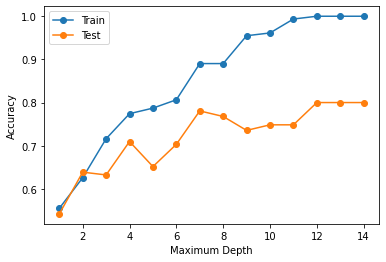



Test size: 0.6 ------------------------------------------------------->
>1, train: 0.597, test: 0.516, acc: 0.51613
>2, train: 0.653, test: 0.618, acc: 0.61828
>3, train: 0.734, test: 0.608, acc: 0.60753
>4, train: 0.815, test: 0.672, acc: 0.67204
>5, train: 0.855, test: 0.667, acc: 0.66667
>6, train: 0.815, test: 0.661, acc: 0.66129
>7, train: 0.863, test: 0.715, acc: 0.71505
>8, train: 0.879, test: 0.720, acc: 0.72043
>9, train: 0.935, test: 0.753, acc: 0.75269
>10, train: 0.952, test: 0.704, acc: 0.70430
>11, train: 0.976, test: 0.774, acc: 0.77419
>12, train: 0.976, test: 0.774, acc: 0.77419
>13, train: 0.992, test: 0.726, acc: 0.72581
>14, train: 1.000, test: 0.731, acc: 0.73118


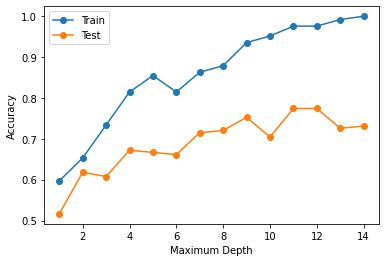



Test size: 0.7 ------------------------------------------------------->
>1, train: 0.624, test: 0.544, acc: 0.54378
>2, train: 0.677, test: 0.544, acc: 0.54378
>3, train: 0.828, test: 0.631, acc: 0.63134
>4, train: 0.828, test: 0.641, acc: 0.64055
>5, train: 0.903, test: 0.714, acc: 0.71429
>6, train: 0.882, test: 0.622, acc: 0.62212
>7, train: 0.978, test: 0.719, acc: 0.71889
>8, train: 0.978, test: 0.696, acc: 0.69585
>9, train: 1.000, test: 0.700, acc: 0.70046
>10, train: 1.000, test: 0.700, acc: 0.70046
>11, train: 1.000, test: 0.700, acc: 0.70046
>12, train: 1.000, test: 0.700, acc: 0.70046
>13, train: 1.000, test: 0.700, acc: 0.70046
>14, train: 1.000, test: 0.700, acc: 0.70046


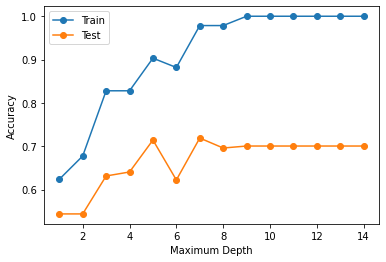



Test size: 0.8 ------------------------------------------------------->
>1, train: 0.613, test: 0.532, acc: 0.53226
>2, train: 0.677, test: 0.560, acc: 0.56048
>3, train: 0.839, test: 0.601, acc: 0.60081
>4, train: 0.839, test: 0.633, acc: 0.63306
>5, train: 0.887, test: 0.665, acc: 0.66532
>6, train: 0.952, test: 0.673, acc: 0.67339
>7, train: 1.000, test: 0.698, acc: 0.69758
>8, train: 1.000, test: 0.698, acc: 0.69758
>9, train: 1.000, test: 0.698, acc: 0.69758
>10, train: 1.000, test: 0.698, acc: 0.69758
>11, train: 1.000, test: 0.698, acc: 0.69758
>12, train: 1.000, test: 0.698, acc: 0.69758
>13, train: 1.000, test: 0.698, acc: 0.69758
>14, train: 1.000, test: 0.698, acc: 0.69758


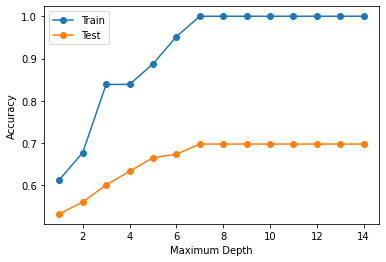



Test size: 0.9 ------------------------------------------------------->
>1, train: 0.677, test: 0.588, acc: 0.58781
>2, train: 0.742, test: 0.606, acc: 0.60573
>3, train: 0.839, test: 0.642, acc: 0.64158
>4, train: 0.903, test: 0.624, acc: 0.62366
>5, train: 0.935, test: 0.634, acc: 0.63441
>6, train: 0.935, test: 0.656, acc: 0.65591
>7, train: 1.000, test: 0.685, acc: 0.68459
>8, train: 1.000, test: 0.685, acc: 0.68459
>9, train: 1.000, test: 0.685, acc: 0.68459
>10, train: 1.000, test: 0.685, acc: 0.68459
>11, train: 1.000, test: 0.685, acc: 0.68459
>12, train: 1.000, test: 0.685, acc: 0.68459
>13, train: 1.000, test: 0.685, acc: 0.68459
>14, train: 1.000, test: 0.685, acc: 0.68459


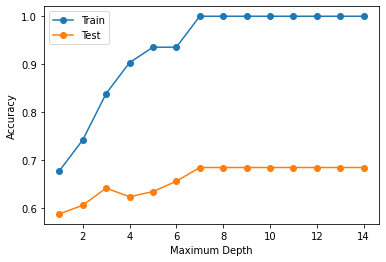

In [117]:
constructDecisionTrees('gini')

# Analysis selected Decision Tree

**Train the selected decision tree**

In [118]:
selected_test_size = 0.1
selected_max_tree_depth = 3
selected_criterion = 'entropy'

In [119]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=selected_test_size, random_state=0)

In [120]:
clf = DecisionTreeClassifier(criterion=selected_criterion
                             ,max_depth=selected_max_tree_depth
                             ,splitter="random"
                              ,random_state=0
                             ) 

clf.fit(X_trainset, y_trainset)
predTree = clf.predict(X_testset)
print("DecisionTrees's Accuracy: %.5f" % (accuracy_score(y_testset, predTree)))

DecisionTrees's Accuracy: 0.61290


**Confusion matrix**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


[[ 1  5  0]
 [ 1  7  4]
 [ 0  2 11]]


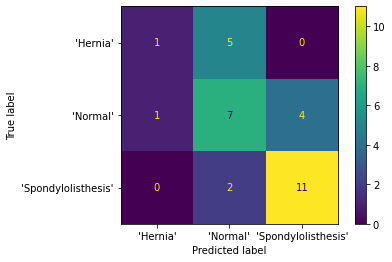

In [146]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(clf, X_testset, y_testset, display_labels=list(label_encoder.classes_))

confmat = confusion_matrix(y_testset, predTree)
print(confmat)

**Tree structure**

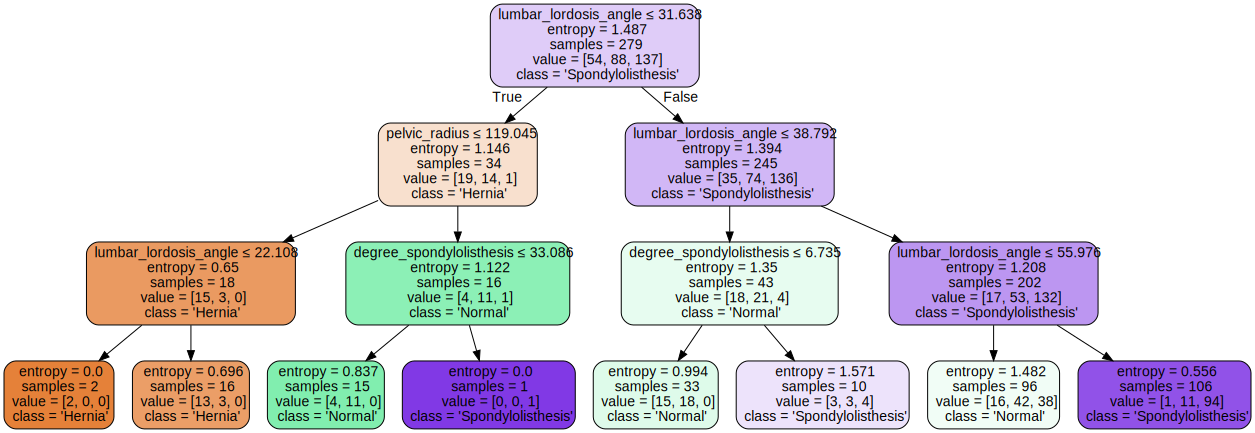

In [132]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                         feature_names=list(df.columns)[:6],   
                         class_names=list(label_encoder.classes_),   
                         filled=True, rounded=True,   
                         special_characters=True)   
 
graph = graphviz.Source(dot_data)   
graph

In [123]:
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [130]:
import dtreeviz.trees

viz_model = dtreeviz.model(clf,
                           X_train=X_trainset, y_train=y_trainset,
                           feature_names=list(df.columns)[:6],
                           target_name='target',
                           class_names=list(label_encoder.classes_))

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


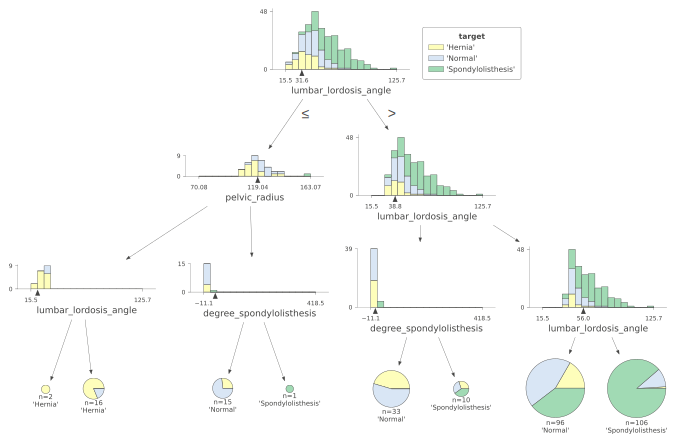

In [140]:
viz_model.view()

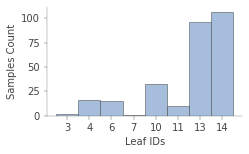

In [136]:
viz_model.leaf_sizes(figsize=(3.5,2))

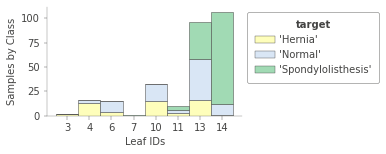

In [137]:
viz_model.ctree_leaf_distributions(figsize=(3.5,2))

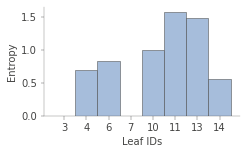

In [138]:
viz_model.leaf_purity(figsize=(3.5,2))